In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import seaborn as sns

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

# Future Warning 메시지 제거
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

apple gothic


In [2]:
df = pd.read_csv('../data/welfare_python.csv')
df

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
16659,2,1967,1,1,NaN,NaN,5
16660,2,1992,5,1,314.0,302.5,5
16661,1,1995,5,1,NaN,NaN,5
16662,2,1998,0,1,NaN,NaN,5


## 전처리

In [3]:
# 성별 문자화

df.loc[df['gender'] == 1, 'gender'] = '남성'
df.loc[df['gender'] == 2, 'gender'] = '여성'
df

,gender,birth,marriage,religion,code_job,income,code_religion
0,여성,1936,2,2,NaN,NaN,1
1,여성,1945,2,2,NaN,NaN,1
2,남성,1948,2,2,942.0,120.0,1
3,남성,1942,3,1,762.0,200.0,1
4,여성,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
16659,여성,1967,1,1,NaN,NaN,5
16660,여성,1992,5,1,314.0,302.5,5
16661,남성,1995,5,1,NaN,NaN,5
16662,여성,1998,0,1,NaN,NaN,5


In [4]:
df['marriage'].value_counts()

marriage
1    8431
0    2861
5    2433
2    2117
3     712
4      84
6      26
Name: count, dtype: int64

In [5]:
# 결혼여부 문자화

def Enco_marriage(x):
    if x == 1:
        return '결혼'
    elif x == 3:
        return '이혼'
    else:
        return '결측치'

df['marriage'] = df['marriage'].apply(lambda x: Enco_marriage(x))
df['marriage'].value_counts()


marriage
결혼     8431
결측치    7521
이혼      712
Name: count, dtype: int64

In [6]:
# merge를 위한 결측치 처리
df['code_job'] = df['code_job'].replace([np.inf, -np.inf], np.nan).fillna(0)
df['code_job'] = df['code_job'].astype(int)
df

,gender,birth,marriage,religion,code_job,income,code_religion
0,여성,1936,결측치,2,0,NaN,1
1,여성,1945,결측치,2,0,NaN,1
2,남성,1948,결측치,2,942,120.0,1
3,남성,1942,이혼,1,762,200.0,1
4,여성,1923,결측치,1,0,NaN,1
...,...,...,...,...,...,...,...
16659,여성,1967,결혼,1,0,NaN,5
16660,여성,1992,결측치,1,314,302.5,5
16661,남성,1995,결측치,1,0,NaN,5
16662,여성,1998,결측치,1,0,NaN,5


In [7]:
# welfare_job에서 동일 컬럼인 job_code를 기준으로 job 정보 추출
job = pd.read_csv('../data/welfare_job.csv', encoding = 'cp949')

df = pd.merge(df, job, 
        on = 'code_job', 
        how = 'left')
df

,gender,birth,marriage,religion,code_job,income,code_religion,job
0,여성,1936,결측치,2,0,NaN,1,NaN
1,여성,1945,결측치,2,0,NaN,1,NaN
2,남성,1948,결측치,2,942,120.0,1,경비원 및 검표원
3,남성,1942,이혼,1,762,200.0,1,전기공
4,여성,1923,결측치,1,0,NaN,1,NaN
...,...,...,...,...,...,...,...,...
16659,여성,1967,결혼,1,0,NaN,5,NaN
16660,여성,1992,결측치,1,314,302.5,5,비서 및 사무 보조원
16661,남성,1995,결측치,1,0,NaN,5,NaN
16662,여성,1998,결측치,1,0,NaN,5,NaN


In [8]:
df['code_religion'].value_counts()

code_religion
2    3711
7    2922
3    2785
1    2486
4    2036
5    1467
6    1257
Name: count, dtype: int64

In [9]:
# code_religion의 7개 권역별 지역 -> 문자열 구분
def religion_str(x):
    if x == 1:
        return '서울'
    elif x == 2:
        return '수도권(인천/경기)'
    elif x == 3:
        return '부산/경남/울산'
    elif x == 4:
        return '대구/경국'
    elif x == 5:
        return '대전/충남'
    elif x == 6:
        return '강원/충북'
    else:
        return '광주/전남/전북/제주도'
    
df['code_religion'] = df['code_religion'].apply(lambda x: religion_str(x))

In [10]:
# age 컬럼 생성
df['age'] = 2024 - df['birth'] + 1
df

,gender,birth,marriage,religion,code_job,income,code_religion,job,age
0,여성,1936,결측치,2,0,NaN,서울,NaN,89
1,여성,1945,결측치,2,0,NaN,서울,NaN,80
2,남성,1948,결측치,2,942,120.0,서울,경비원 및 검표원,77
3,남성,1942,이혼,1,762,200.0,서울,전기공,83
4,여성,1923,결측치,1,0,NaN,서울,NaN,102
...,...,...,...,...,...,...,...,...,...
16659,여성,1967,결혼,1,0,NaN,대전/충남,NaN,58
16660,여성,1992,결측치,1,314,302.5,대전/충남,비서 및 사무 보조원,33
16661,남성,1995,결측치,1,0,NaN,대전/충남,NaN,30
16662,여성,1998,결측치,1,0,NaN,대전/충남,NaN,27


In [11]:
# 종교 컬럼 문자화
df.loc[df['religion'] == 1, 'religion'] = '있음'
df.loc[df['religion'] == 2, 'religion'] = '없음'
df

,gender,birth,marriage,religion,code_job,income,code_religion,job,age
0,여성,1936,결측치,없음,0,NaN,서울,NaN,89
1,여성,1945,결측치,없음,0,NaN,서울,NaN,80
2,남성,1948,결측치,없음,942,120.0,서울,경비원 및 검표원,77
3,남성,1942,이혼,있음,762,200.0,서울,전기공,83
4,여성,1923,결측치,있음,0,NaN,서울,NaN,102
...,...,...,...,...,...,...,...,...,...
16659,여성,1967,결혼,있음,0,NaN,대전/충남,NaN,58
16660,여성,1992,결측치,있음,314,302.5,대전/충남,비서 및 사무 보조원,33
16661,남성,1995,결측치,있음,0,NaN,대전/충남,NaN,30
16662,여성,1998,결측치,있음,0,NaN,대전/충남,NaN,27


In [12]:
# income 결측치 대체
# nan -> 평균값
income_mean = df['income'].mean()
print(income_mean)

df['income'] = df['income'].fillna(income_mean)
df['income'] = round(df['income'], 2)
df

241.61901596892534


,gender,birth,marriage,religion,code_job,income,code_religion,job,age
0,여성,1936,결측치,없음,0,241.62,서울,NaN,89
1,여성,1945,결측치,없음,0,241.62,서울,NaN,80
2,남성,1948,결측치,없음,942,120.00,서울,경비원 및 검표원,77
3,남성,1942,이혼,있음,762,200.00,서울,전기공,83
4,여성,1923,결측치,있음,0,241.62,서울,NaN,102
...,...,...,...,...,...,...,...,...,...
16659,여성,1967,결혼,있음,0,241.62,대전/충남,NaN,58
16660,여성,1992,결측치,있음,314,302.50,대전/충남,비서 및 사무 보조원,33
16661,남성,1995,결측치,있음,0,241.62,대전/충남,NaN,30
16662,여성,1998,결측치,있음,0,241.62,대전/충남,NaN,27


In [13]:
# 연령대 구간별 ageg 컬럼 신설
df['ageg'] = 99

for i in range(len(df)):
    if df.loc[i, 'age'] >= 60:
        df.loc[i, 'ageg'] = '노년'

    elif df.loc[i, 'age'] >= 30:
        df.loc[i, 'ageg'] = '중년'

    else:
        df.loc[i, 'ageg'] = '청년'

df['ageg'].value_counts()

ageg
노년    8185
중년    5429
청년    3050
Name: count, dtype: int64

In [14]:
cols_mapping = {'gender' : '성별', 'birth' : '생일', 'marriage' : '결혼 유무', 'religion' : '종교 유무', 'code_job' : '직업 코드', 'income' : '소득',
       'code_religion' : '지역구', 'job' : '직업', 'age' : '나이', 'ageg' : '연령대'}

df = df.rename(columns = cols_mapping)

In [15]:
df.groupby('결혼 유무')['결혼 유무'].count()

결혼 유무
결측치    7521
결혼     8431
이혼      712
Name: 결혼 유무, dtype: int64

## Countplot

<Axes: title={'center': '결혼 유무 빈도'}, xlabel='결혼 유무', ylabel='count'>

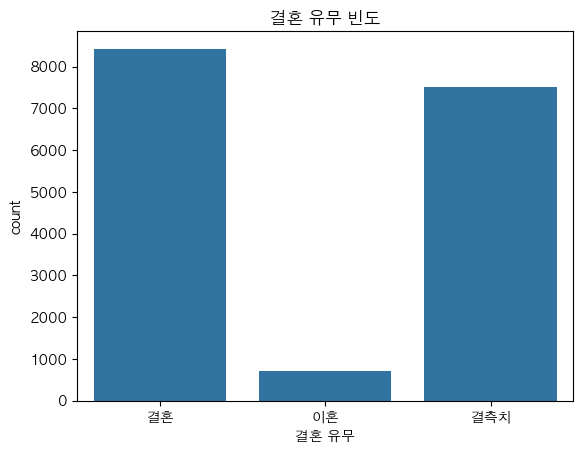

In [16]:
order = ['결혼', '이혼', '결측치']  # order 매개변수로 컬럼 순서 지정

plt.figure()
plt.title('결혼 유무 빈도')
sns.countplot(data = df, x = '결혼 유무', order = order)

In [17]:
# 결혼 유무와 종교 여부 빈도 비교
df.groupby(['결혼 유무', '종교 유무'])['결혼 유무'].count()

결혼 유무  종교 유무
결측치    없음       4015
       있음       3506
결혼     없음       4218
       있음       4213
이혼     없음        384
       있음        328
Name: 결혼 유무, dtype: int64

<Axes: title={'center': '결혼 유무 vs 종교 유무'}, xlabel='결혼 유무', ylabel='count'>

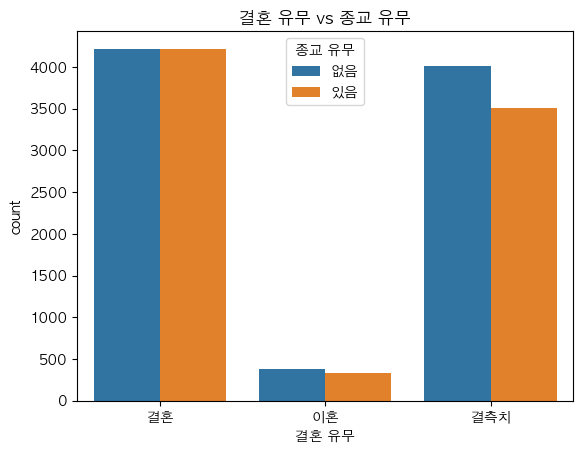

In [18]:
plt.figure()
plt.title('결혼 유무 vs 종교 유무')
sns.countplot(data = df, x = '결혼 유무', hue = '종교 유무', order = order)

<Axes: title={'center': '가로 막대로 그리기'}, xlabel='count', ylabel='결혼 유무'>

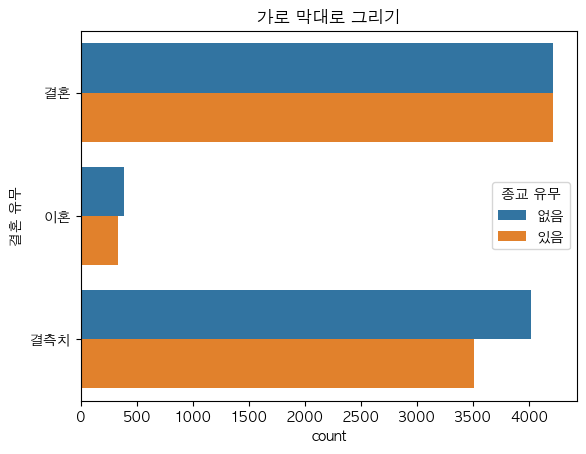

In [20]:
# 가로 막대로 그리기
plt.figure()
plt.title('가로 막대로 그리기')
plt.legend('종교 유무')
sns.countplot(data = df, y = '결혼 유무', hue = '종교 유무', order = order)

<Axes: title={'center': '색상 팔레트 설정'}, xlabel='결혼 유무', ylabel='count'>

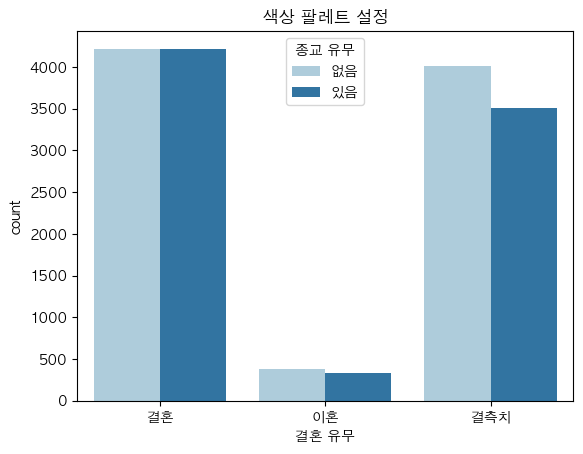

In [21]:
# 팔레트 색상 지정
plt.figure()
plt.title('색상 팔레트 설정')
sns.countplot(data = df, x = '결혼 유무', hue = '종교 유무', palette = 'Paired', order = order)

## Displot

<Figure size 640x480 with 0 Axes>

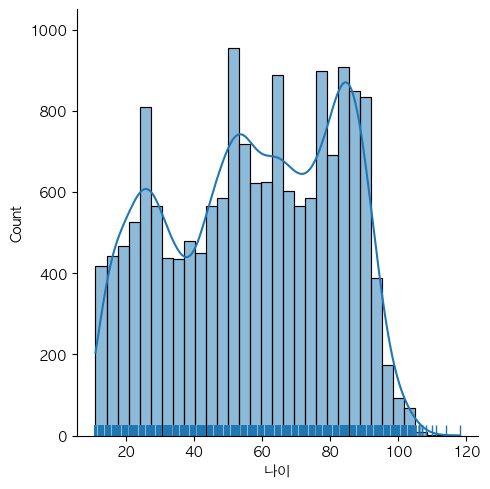

In [33]:
# rug: 데이터 포인트를 축에 작은 선분(rug)을 사용하여 표시합니다. 이는 데이터의 밀도를 시각적으로 확인할 수 있도록 도와줍니다.
# kde: 커널 밀도 추정(kde) 곡선을 그립니다. 이는 데이터의 확률 밀도 함수를 추정하여 부드러운 곡선으로 표현합니다.

age = df['나이']

plt.figure()
sns.displot(age, rug = True, kde = True)

Text(0.5, 1.0, '컬러 바꾸기')

<Figure size 640x480 with 0 Axes>

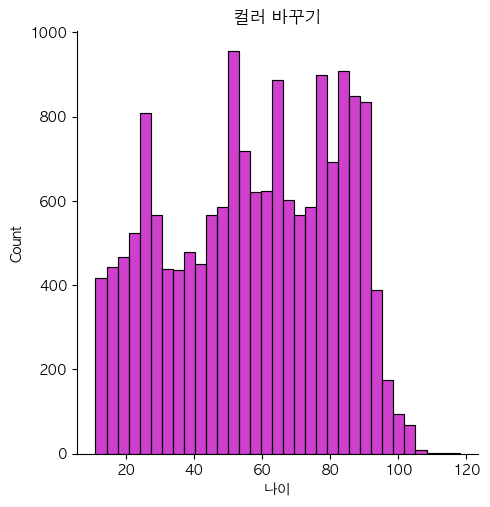

In [47]:
# 색상 지정

plt.figure()
sns.displot(age, color = 'm')
plt.title('컬러 바꾸기')

## 히트맵(heatmap)


- data: 2차원 형식의 데이터 셋(df 등등)
- cmap: colormap 이름이나 색상을 담고 있는 list 자료 구조를 사용
- annot: cell에 해당하는 수치 값 표현

In [51]:
# 피벗 테이블
pivot = df.pivot_table(index = '성별', columns = '결혼 유무', values = '나이')
pivot

결혼 유무,결측치,결혼,이혼
성별,,,
남성,35.535796,68.721229,66.242236
여성,53.149036,65.185876,65.205128


<Axes: xlabel='결혼 유무', ylabel='성별'>

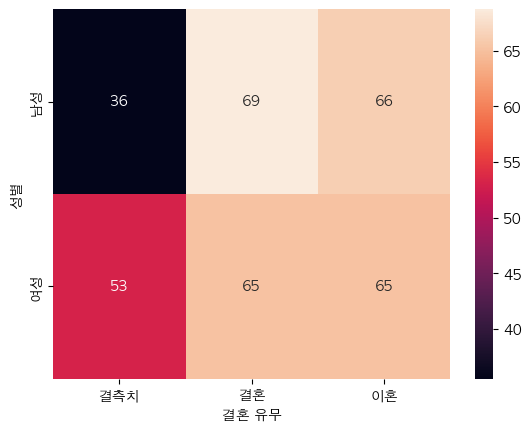

In [53]:
plt.figure()
sns.heatmap(data = pivot, annot = True)

In [62]:
# 상관관계 시각화

# 연속형 범수만 추출
cols_num = df.select_dtypes(include = 'number').columns.to_list()
corr = df[cols_num].corr()
corr

,생일,직업 코드,소득,나이
생일,1.000000,-0.177963,0.040470,-1.000000
직업 코드,-0.177963,1.000000,-0.144999,0.177963
소득,0.040470,-0.144999,1.000000,-0.040470
나이,-1.000000,0.177963,-0.040470,1.000000


<Axes: >

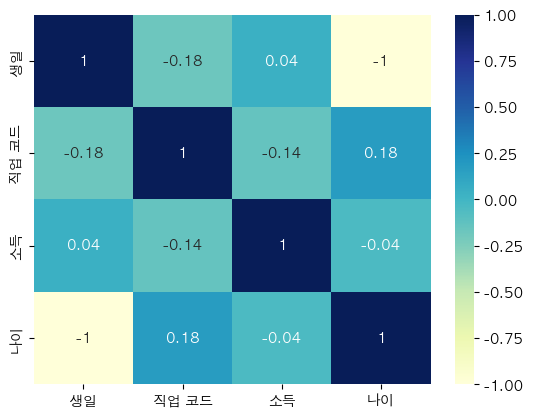

In [68]:
# 생일과 나이의 상관계수는 -1. 나이가 많을수록 생일은 멀어지므로
sns.heatmap(data = corr, annot = True, cmap = 'YlGnBu')

## pairplot

- data: 적용할 데이터 프레임 지정
- hue: 특성을 구분할 컬럼 지정
- palette: 팔레트를 지정하는 옵션
- height: 각 facet의 높이를 inches로 지정
- markers: 마킹될 도형의 모양을 지정(ex: ['o', 's', 'D', 'P'])

In [71]:
# 사용할 데이터 별도 추출
new_data = df.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]
new_data

,직업 코드,소득,나이,결혼 유무
0,0,241.62,89,결측치
1,0,241.62,80,결측치
2,942,120.00,77,결측치
3,762,200.00,83,이혼
4,0,241.62,102,결측치
...,...,...,...,...
16659,0,241.62,58,결혼
16660,314,302.50,33,결측치
16661,0,241.62,30,결측치
16662,0,241.62,27,결측치


Text(0.5, 1.0, '기본 pairplot')

<Figure size 640x480 with 0 Axes>

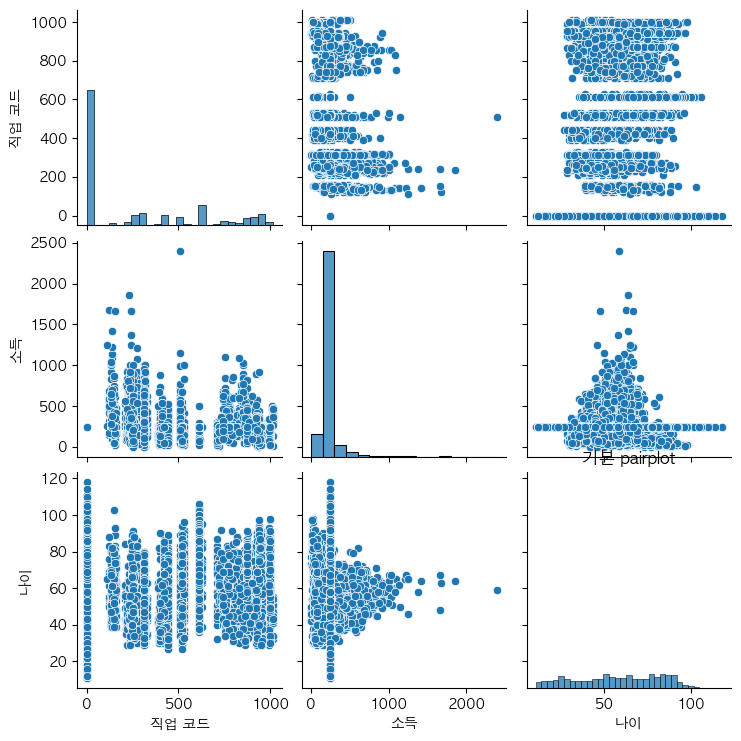

In [74]:
# pairplot
# 우측 중앙 소득과 나이 상관관계를 볼 경우 50대에서 가장 많은 소득이 발생하는 사실을 확인할 수 있음

plt.figure()
sns.pairplot(data = new_data)
plt.title('기본 pairplot')

Text(0.5, 1.0, 'hue 옵션을 통한 특성 구분')

<Figure size 640x480 with 0 Axes>

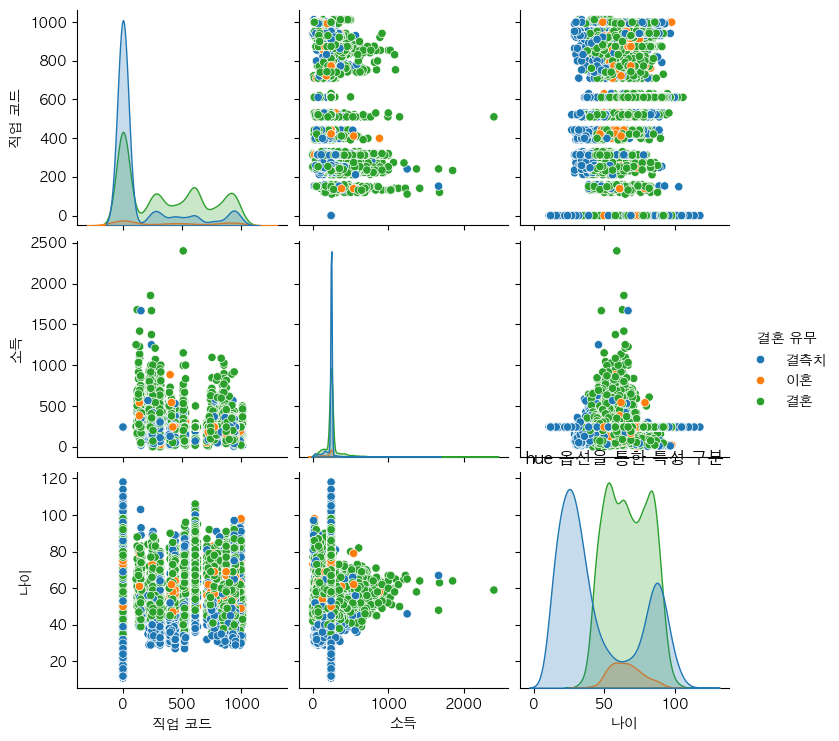

In [78]:
# hue 매개변수를 통해 '결혼 유무'에 대한 데이터만 구별 확인
plt.figure()
sns.pairplot(data = new_data, hue = '결혼 유무')
plt.title('hue 옵션을 통한 특성 구분')

Text(0.5, 1.0, '컬러 팔레트 적용')

<Figure size 640x480 with 0 Axes>

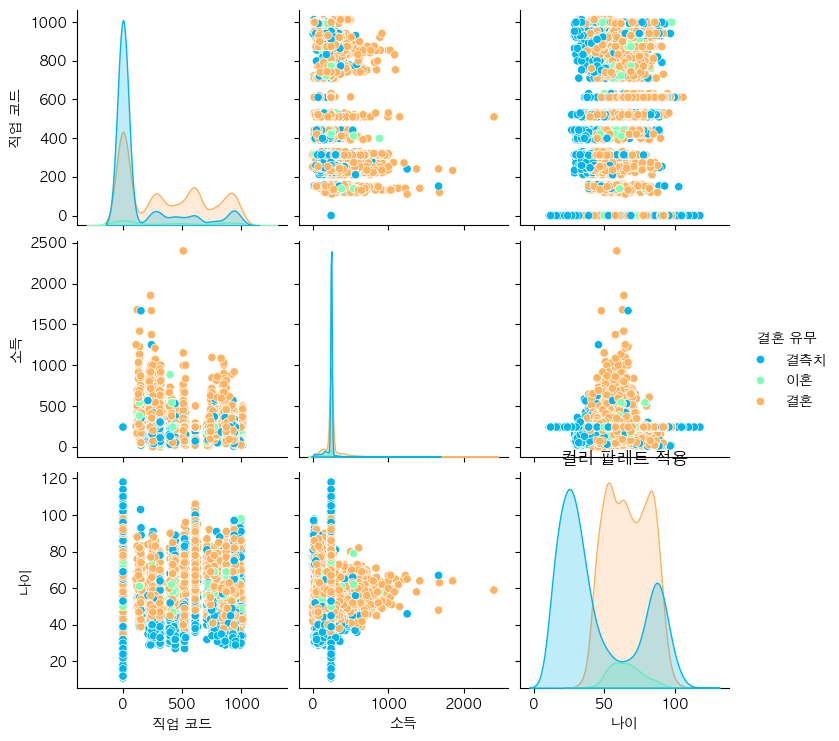

In [79]:
# palette 매개변수를 통해 색상 지정
plt.figure()
sns.pairplot(data = new_data, hue = '결혼 유무', palette = 'rainbow')
plt.title('컬러 팔레트 적용')

Text(0.5, 1.0, 'height 옵션으로 높이 지정')

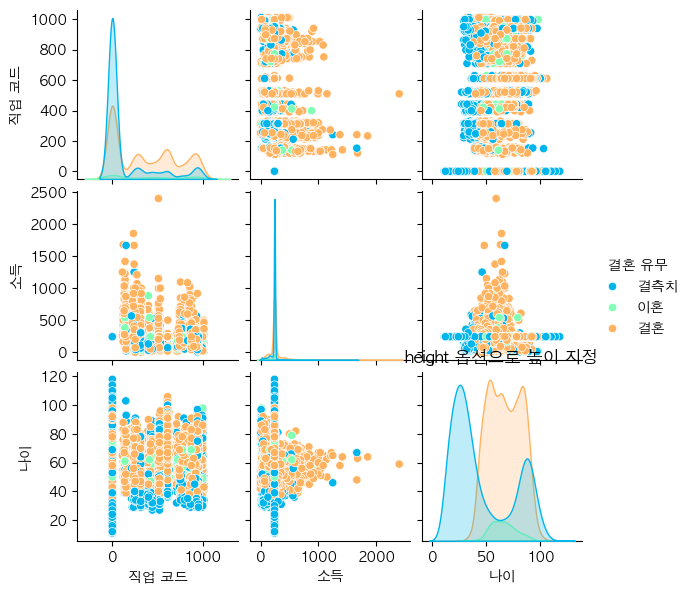

In [86]:
# height 매개변수를 통해 각 facet의 높이를 inches 값으로 지정
sns.pairplot(data = new_data, hue = '결혼 유무', palette = 'rainbow', height = 2)
plt.title('height 옵션으로 높이 지정')

## 바이올린 그래프

- x: 그리고자 하는 컬럼 명시
- data: 대상이 되는 데이터프레임 지정
- hue: 특성을 구분할 컬럼을 지정
- palette: 색상 팔레트 지정

In [83]:
df['나이'].describe()

count    16664.000000
mean        57.431289
std         24.179743
min         11.000000
25%         37.000000
50%         59.000000
75%         79.000000
max        118.000000
Name: 나이, dtype: float64

Text(0.5, 1.0, '나이에 대한 바이올린 그래프')

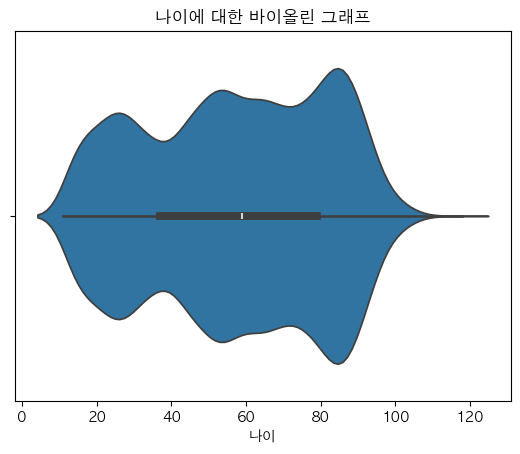

In [87]:
# 나이 컬럼의 통계 정보 활용해 바이올린 그래프 생성

plt.figure()
sns.violinplot(data = df, x = '나이')
plt.title('나이에 대한 바이올린 그래프')

<Axes: xlabel='성별', ylabel='나이'>

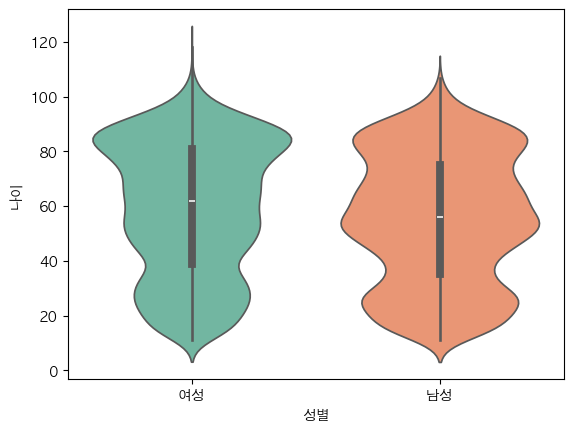

In [91]:
# 비교 분포 확인(성별)
# palette 매개변수로 색상 구분
plt.figure()
sns.violinplot(x = '성별', y = '나이', data = df, palette = 'Set2')

<Axes: xlabel='나이', ylabel='성별'>

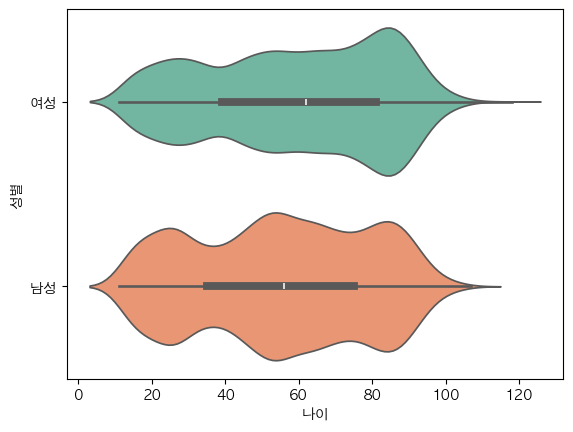

In [101]:
# x와 y를 변경해 가로로 그래프 생성
plt.figure()
sns.violinplot(x = '나이', y = '성별', data = df, palette = 'Set2')

<Axes: xlabel='종교 유무', ylabel='나이'>

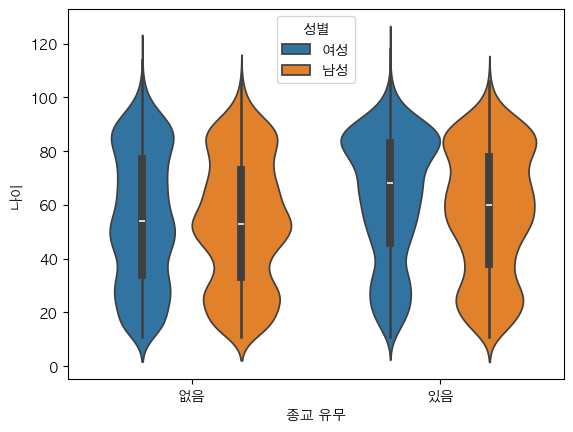

In [104]:
# hue 매개변수로 성별 분리 구분
plt.figure()
sns.violinplot(x = '종교 유무', y = '나이', hue = '성별', data = df)

## 선형 회귀 모델 그래프(impolot)

- x, y: 축에 그려질 데이터 명시
- data: 사용할 데이터프레임 지정
- hue: 특성 구분할 컬럼 지정
- height: 각 항목의 면(Facet)에 대한 높이를 inch 단위로 지정
- col='성별': 항목별 그래프 별도 생성 가능
- col_wrap=숫자: 한 줄에 표기할 columns이 갯수 명시
- scatter_kws: scatter 관련 keyword 사전 형식 지정
    - 예)scatter_kws = dict(s=60, linewidths=0.7, edgecolors='black')